
# **Assignment 1**


## Task 1. Correlation
We will use the data example from the textbook "Statistical Analysis with The General Linear Model" by Miller and Haden (2013), Chapter 11.

As in Miller and Haden, we have five columns:

-Participant (Participant),

-Reading Ability (Abil),

-Intelligence (IQ),

-Number of minutes spent reading at home per week (Home),

-Number of minutes spent watching TV per week (TV).


For the task we will focus on the relationship between Reading Ability and IQ, but for further practice you can look at other relationships on your own.

**Question 1**:

a. Check whether the data is interval, ratio, or ordinal.

b. Check whether there is a data point for each participant on both variables.

c. Check whether the data is normally distributed in both variables.

d. Create a scatter plot with Reading Ability being the x-axis and IQ, being the y-axis.

e. Draw a correlation line on the scatter plot.


**Instructions:**

1. Load the necessary libraries and explain why you need them ("#used for ...").

2. Read the MillerHadenData.csv file into a DataFrame and name it "df_mh".

In [1]:
import pandas as pd # used for data wrangling
import seaborn as sns # used for visualization
import matplotlib  # used for data visualization
from matplotlib import pyplot as plt # used for creating plots
import pylab # used for data visualization
import pingouin as pg # used for statistical analysis

df_mh = pd.read_csv('MillerHadenData.csv')

In [2]:
# Q1a (code):
# Display first few rows of the dataframe
df_mh.head()

,Participant,Abil,IQ,Home,TV
0,1,61,107,144,487
1,2,56,109,123,608
2,3,45,81,108,640
3,4,66,100,155,493
4,5,49,92,103,636


In [3]:
# Check data types and information
df_mh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Participant  25 non-null     int64
 1   Abil         25 non-null     int64
 2   IQ           25 non-null     int64
 3   Home         25 non-null     int64
 4   TV           25 non-null     int64
dtypes: int64(5)
memory usage: 1.1 KB


The datatype of the Participant is ordinal.\
The datatype of Abli and IQ is interval because there is no true zero point.\
The datatype of Home and TV is ratio, because it can have a true zero point, indicating the absence of the quantity.

In [4]:
# Q1b (code):
# Check for missing values
df_mh.isnull().sum()

Participant    0
Abil           0
IQ             0
Home           0
TV             0
dtype: int64

There are no missing values.

In [5]:
# Check whether there is a data point for each participant on both variables
df_mh.isna()

,Participant,Abil,IQ,Home,TV
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


There is a data point for each participant on both variables.

array([[<AxesSubplot:title={'center':'Abil'}>,
        <AxesSubplot:title={'center':'IQ'}>],
       [<AxesSubplot:title={'center':'Home'}>,
        <AxesSubplot:title={'center':'TV'}>]], dtype=object)

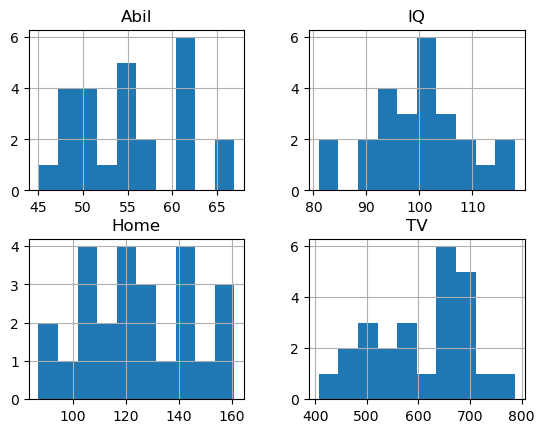

In [6]:
# Q1c (code):
# Check data distribution
df_mh.hist(['Abil','IQ','Home','TV']) 

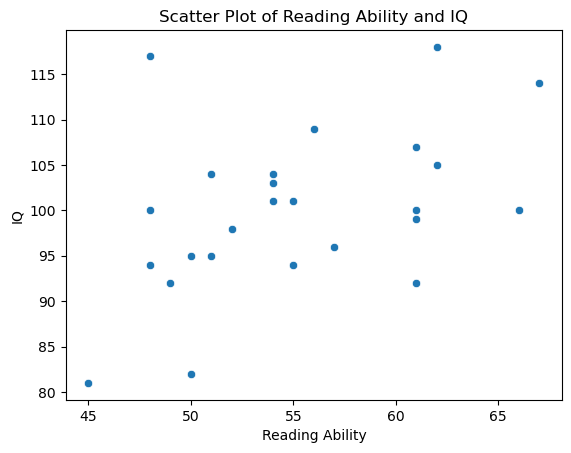

In [7]:
# Q1d (code):
# Scatter plot
sns.scatterplot(x='Abil', y='IQ', data=df_mh)
plt.title('Scatter Plot of Reading Ability and IQ')
plt.xlabel('Reading Ability')
plt.ylabel('IQ')
plt.show()

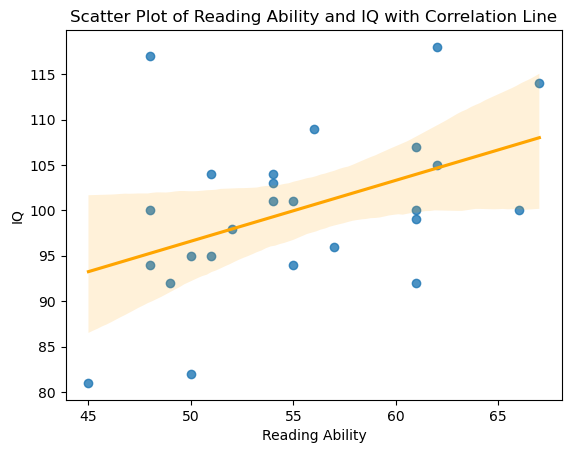

In [8]:
# Q1e (code):
# Correlation line
sns.regplot(x='Abil', y='IQ', data=df_mh, line_kws={"color": "Orange"})
plt.title('Scatter Plot of Reading Ability and IQ with Correlation Line')
plt.xlabel('Reading Ability')
plt.ylabel('IQ')
plt.show()

**Question 2**:

a. Which correlation coefficient test can we use, Pearson or Spearman? Briefly explian why based on the results of Question 1.

b. Conduct a correlation coefficient test.

c. Interpret the result (direction and strength of the association between the two varibles)

In [9]:
# Q2a (answer with words):

We can use Pearson correlation coefficient test, because our variables are normally distributed.

In [10]:
# Q2b (code):
from scipy.stats import pearsonr
pearsonr(df_mh['Abil'], df_mh['IQ'])

PearsonRResult(statistic=0.45116993876507616, pvalue=0.023592608833614474)

In [11]:
# Q2c (answer with words):

The Pearson coefficient is 0.45, representing a positive correlation between reading ability and IQ. It implies that as reading ability increases, the data of IQ will increase as well. The coefficient of 0.45 indicates a moderate linear relationship between the variables.

## Task 2. Chi-square Test
We will continue to use the data example from Task 1.

We want to explore whether there are significant differences in the amount of time spent reading at home per week (Home) among people with different reading abilities (Reading Ability). Therefore, we will divide the reading ability of all participants into two groups. The first group is those with low reading ability (Reading Ability at or below the rounded average), and the second group is those with high reading ability (Reading Ability above the rounded average). We will store this grouping in a new column named "Rank_Abil".


Similarly, the reading time is divided into two different scenarios: the first scenario is infrequent reading (Home at or below the rounded average), and the other is frequent reading (Reading Ability above the rounded average). We will store this grouping in a new column named "Rank_Home".


Then, construct a Contingency Matrix and perform a Chi-square test.

**Question 3**:

a. Please state the null hypothesis (H0) and alternative hypothesis (H1) for this Chi-square test.

b. Based on the task description, add new columns “Rank_Abil” and "Rank_Home" to the dataframe df_mh.

c. Construct a Contingency Matrix.

d. Perform a Chi-square test.

e. Interpret the results of the Chi-square test (answer in text).

In [12]:
# Q3a (answer in words):

H0: There is no relationship between reading ability and the the amount of time spent reading at home per week.\
H1: There is a significant relationship between reading ability and the the amount of time spent reading at home per week.

In [13]:
# Q3b (code):
# Import necessary libraries
import numpy as np
import pandas as pd  ##used for data wrangling
from scipy.stats import chi2_contingency ##used for performing Chi-square Test

# Define the rounded average for Reading Ability and Home
rounded_average_abil = round(df_mh['Abil'].mean())
rounded_average_home = round(df_mh['Home'].mean())

# Create the Rank_Abil column
df_mh['Rank_Abil'] = np.where(df_mh['Abil'] <= rounded_average_abil, 'Low', 'High')

# Create the Rank_Home column
df_mh['Rank_Home'] = np.where(df_mh['Home'] <= rounded_average_home, 'Infrequent', 'Frequent')

In [14]:
# Q3c (code):
# Construct Contingency Matrix
contingency_matrix = pd.crosstab(df_mh['Rank_Abil'], df_mh['Rank_Home'])
contingency_matrix

Rank_Home,Frequent,Infrequent
Rank_Abil,,
High,8,2
Low,3,12


In [15]:
# Q3d (code):
# Perform the Chi-square test
chi2_contingency(contingency_matrix)

(6.500270562770561,
 0.010785807794066234,
 1,
 array([[4.4, 5.6],
        [6.6, 8.4]]))

In [16]:
# Q3e (answer in words):

P-value is 0.0108, which is less than 0.05, so we reject the null hypothesis. This means that there is a significant relationship between reading ability and the amount of time spent reading at home per week.

## Task 3. Two-sample t-test
As we discussed on Week 3, Two-sample designs are very useful when we want to know whether there is a difference between groups on a particular variable.

In this assignment, you will be guided to replicate the Experiment 4 (p. 887-888) from the paper below, focusing on understanding the data through descriptive statistics, visualizing distributions, testing assumptions (normality and variance homogeneity), and finally performing the independent t-test.

Schroeder, J. and Epley, N. (2015). The sound of intellect: Speech reveals a thoughtful mind, increasing a job candidate's appeal. Psychological Science, 26, 277--891.


As we explained during Week 3 lecture, there are different types of two-sample designs depending on whether or not the two groups are independent (e.g., different participants in different conditions) or not (e.g., same participants in different conditions). In this course we focus on independent samples, which typically means that the observations in the two groups are unrelated - usually meaning different people. But in real practice you will need to go through similar procedures to determine which is the proper statistical test to use.




### Background of data: Speech as indicator of intellect
To recap on Experiment 4, 39 professional recruiters from Fortune 500 companies evaluated job pitches of M.B.A. candidates (Masters in Business Administration) from the University of Chicago Booth School of Business. The methods and results appear on pages 887--889 of the article if you want to look at them specifically for more details.

###Step 1: Analyze the demographics of evaluators from the provided dataset

**Instructions:**

1. Load the necessary libraries (pandas, scipy, numpy, matplotlib.pyplot, seaborn) and explain why you need them ("#used for ...").

2. Read the evaluators.csv file into a DataFrame.

3. Calculate the mean and standard deviation of the age of the evaluators, handling missing values appropriately.

4. Count how many male and female evaluators were in the study.

**Question 4:**

a. What was the mean age of the evaluators?
What was the standard deviation of the age of the evaluators?

b. How many participants were female and how many participants were male?


In [17]:
import pandas as pd # used for data wrangling
from scipy import stats # used for probabilistic distributions and statistical operations
import numpy as np # used for mathematical operations
import matplotlib.pyplot as plt #used for data visualization
import seaborn as sns #used for data visualization

# Load the data
df_evaluators = pd.read_csv('evaluators.csv')
df_evaluators.head()

,eval_id,condition,age,sex
0,1,listened,29.0,2.0
1,2,listened,27.0,2.0
2,3,listened,27.0,2.0
3,4,read,40.0,2.0
4,5,read,32.0,2.0


In [18]:
# Q4a (code):
# Calculate mean and standard deviation for age
age_mean = df_evaluators['age'].mean()
age_sd = df_evaluators['age'].std()
print(f"The mean for age is {age_mean}")
print(f"The standard deviationfor age is {age_sd}")

The mean for age is 30.852941176470587
The standard deviationfor age is 6.238358141327351


In [19]:
# Q4b (code)
# Count male and female evaluators
# In the 'sex' column: 1 represents males and 2 represents females
male_number = (df_evaluators['sex'] == 1).sum()
female_number = (df_evaluators['sex'] == 2).sum()

print(f"Number of Male Evaluators: {male_number}")
print(f"Number of Female Evaluators: {female_number}")

Number of Male Evaluators: 4
Number of Female Evaluators: 30


###Step 2: Calculate overall intellect ratings from evaluators and prepare a combined dataset for analysis

We are now going to calculate an overall intellect rating given by each evaluator. To break that down a bit, we are going to calculate how intellectual the evaluators (the raters) thought candidates were overall, depending on whether the evaluators read or listened to the candidates' resume pitches. This is calculated by averaging the ratings of competent, thoughtful and intelligent for each evaluator held within ratings.csv.

Note: We are not looking at ratings to individual candidates; we are looking at overall ratings for each evaluator. This is a bit confusing but makes sense if you stop to think about it a little. You can think about it in terms of "do raters rate differently depending on whether they read or listen to a resume pitch".
We will then combine the overall intellect rating with the overall impression ratings and overall hire ratings for each evaluator, all ready found in ratings.csv. In the end we will have a new new dataframe named "ratings2" - which has the below structure:

**eval_id** shows the evaluator ID. Each evaluator has a different ID. So all the 1's are the same evaluator.

**Category** shows the scale that they were rating on - intellect, hire, impression

**Rating** shows the overall rating given by that evaluator on a given scale.

**condition** shows whether that evaluator listened to (e.g., evaluators 1, 2 and 3), or read (e.g., evaluator 4) the resume.


**Instructions:**

1. Load the ratings.csv file.

2. Filter and calculate the mean intellect rating for each evaluator.

3. Combine this with overall impression and hire ratings to create a new DataFrame named "rating2".

4. Merge this DataFrame with the evaluator demographics.

**Question 5**:

Print the head of "rating2".


In [20]:
# Load ratings data
df_ratings = pd.read_csv('ratings.csv')
df_ratings.head()

,eval_id,Category,Rating
0,1,competent,6.0
1,1,thoughtful,6.0
2,1,intelligent,6.0
3,1,impression,7.0
4,1,hire,6.0


In [21]:
# Q5 (code):
# Filter the ratings DataFrame to include only 'thoughtful', 'competent', and 'intelligent' categories
categories = ['thoughtful', 'competent', 'intelligent']
filtered_df = df_ratings[df_ratings['Category'].isin(categories)]

# Calculate the mean intellect rating for each evaluator
# Group by 'eval_id' and calculate mean, then reset the index to convert groupby object back to DataFrame
intellect_mean = filtered_df.groupby('eval_id')['Rating'].mean().reset_index()

# Add a 'Category' column with the value 'intellect' for these rows
intellect_mean['Category'] = 'intellect'

# Create a DataFrame for 'impression' and 'hire' ratings
other_ratings = df_ratings[df_ratings['Category'].isin(['impression', 'hire'])]

# Combine the DataFrames to create 'ratings2'
# Concatenate the 'intellect_mean' DataFrame with the 'other_ratings' DataFrame
ratings2 = pd.concat([intellect_mean, other_ratings])

# Join 'ratings2' with the 'df_evaluators' DataFrame to add the 'condition' column
ratings2 = ratings2.merge(df_evaluators[['eval_id', 'condition']], on='eval_id', how='left')

# Select only the necessary columns as per the structure required
ratings2 = ratings2[['eval_id', 'Category', 'Rating', 'condition']]

# Arrange by 'eval_id' and 'Category'
ratings2.sort_values(by=['eval_id', 'Category'], inplace=True)

# Display the first few rows of the final 'ratings2' DataFrame to verify
ratings2.head()

,eval_id,Category,Rating,condition
40,1,hire,6.000000,listened
39,1,impression,7.000000,listened
0,1,intellect,6.000000,listened
42,2,hire,4.000000,listened
41,2,impression,4.666667,listened


###Step 3: Perform descriptive and inferential statistical analyses, including testing assumptions and conducting independent t-tests.

We are going to run the t-tests for Intellect, Hire and Impression; each time comparing evaluators overall ratings for the listened group versus overall ratings for the read group to see if there was a significant difference between the two conditions: i.e., did the evaluators who listened to pitches give a significant higher or lower rating than evaluators that read pitches?

**Question 6**:

a. In terms of hypotheses, how can we phrase the hypothesis?

b. Which t-test should we choose, one-tail or two-tail? And explian why.

c. What are the independent variable and the dependent variable here?



In [22]:
# Q6a (answer in words):
# Null hypothesis:

There is no significant difference between overall ratings on the  Intellect, Hire and Impression scale between evaluators who listened to resume pitches and evaluators who read the resume pitches.

In [23]:
# Alternative hypothesis:

There will be a significant difference between overall ratings on the  intellect, hire and impression scale between evaluators who listened to resume pitches and evaluators who read the resume pitches.

In [24]:
# Q6b (answer in words):
# Which t-test should we choose, one-tail or two-tail? Explian why.

We should choose two-tail, becasue we want to if there is any difference between the groups.

In [25]:
# Q6c (answer in words):
# What are the independent variable and the dependent variable here?

Independent Variable: the condition of the evaluator (listened/read)\
Dependent Variable: the ratings of intellect, hire and impression given by the evaluator


To clarify, we are going to run three between-subjects t-tests in total; one for intellect ratings; one for hire ratings; one for impression ratings.

**Instructions:**

1. Descriptive analysis of the ratings.

2. Test for normal distribution (Shapiro-Wilk test) and homogeneity of variances (Levene's test) for the intellect, impression, and hire ratings.

3. Conduct independent t-tests comparing intellect, impression, and hire ratings between conditions (listened vs. read).

Hints: three T-tests need to be performed.

**Question 7**:

a: Print the test results.

b: Interpret the results of the above descriptive statistics, Shapiro-Wilk test, Levene's test, and independent t-tests. Explian why we use these tests and how we made our decisions based on the test result.

In [26]:
##Q7a (code):
from scipy.stats import shapiro, levene, ttest_ind # used for statistic tests

# Descriptive analysis of the ratings
ratings_desc=ratings2.groupby(['Category', 'condition'])['Rating'].describe()
ratings_desc

count      mean       std       min       25%       50%  \
Category   condition                                                            
hire       listened    21.0  4.714286  2.261479  0.000000  4.000000  5.000000   
           read        18.0  2.888889  2.054805  0.000000  1.250000  2.000000   
impression listened    21.0  5.968254  1.917477  2.333333  4.666667  6.666667   
           read        18.0  4.074074  2.233306  0.333333  2.166667  4.500000   
intellect  listened    21.0  5.634921  1.608674  2.333333  5.000000  5.666667   
           read        18.0  3.648148  1.911343  0.666667  2.083333  3.666667   

                           75%       max  
Category   condition                      
hire       listened   7.000000  8.000000  
           read       4.000000  7.000000  
impression listened   7.333333  8.666667  
           read       5.333333  7.333333  
intellect  listened   6.000000  9.000000  
           read       4.666667  7.000000

Descriptive Analysis:\
The results indicate that evaluators who listened to candidates' resume pitches tend to give higher ratings compared to those who read the resume in all three categories.\
The standard deviation of the impression category between the listened and read groups is the largest among the three categories, suggesting that the impression rating is most influenced by whether evaluators listened to or read the resume.

In [27]:
ratings2.head()

,eval_id,Category,Rating,condition
40,1,hire,6.000000,listened
39,1,impression,7.000000,listened
0,1,intellect,6.000000,listened
42,2,hire,4.000000,listened
41,2,impression,4.666667,listened


In [28]:
# Test for normal distribution (Shapiro-Wilk test)
shapiro_results = {}
for category in ratings2['Category']:
    # extract rating data for every category
    ratings = ratings2[ratings2['Category'] == category]['Rating']
    # pefrom the shapiro test
    score_shapiro, p_val_shapiro = shapiro(ratings)
    # store the p_value to the resluts dictionary
    shapiro_results[category] = p_val_shapiro
print(shapiro_results)

{'hire': 0.04710369557142258, 'impression': 0.17238670587539673, 'intellect': 0.5182666182518005}


In [29]:
# Test for homogeneity of variances (Levene's test)
levene_results = {}

for category in ratings2['Category'].unique():
    # extract rating data for listened condition
    listened_ratings = ratings2.loc[(ratings2['Category'] == category) & (ratings2['condition'] == 'listened'), 'Rating']
    # extract rating data for read condition
    read_ratings = ratings2.loc[(ratings2['Category'] == category) & (ratings2['condition'] == 'read'), 'Rating']
    # perform Levene's test
    score_levene, p_val_levene = levene(listened_ratings, read_ratings)
    #store the p_value to the resluts dictionary
    levene_results[category] = p_val_levene

print(levene_results)


{'hire': 0.7458453933447955, 'impression': 0.5358960150374064, 'intellect': 0.34946205893248505}


In [30]:
# Independent t-tests
# Mann–Whitney U test for hire
from scipy.stats import mannwhitneyu #used for Mann–Whitney U test
listened_ratings = ratings2.loc[(ratings2['Category'] == 'hire') & (ratings2['condition'] == 'listened'), 'Rating']
read_ratings = ratings2.loc[(ratings2['Category'] == 'hire') & (ratings2['condition'] == 'read'), 'Rating']
stat, p_val_mannwhitneyu = mannwhitneyu(listened_ratings, read_ratings)
print(f"The P-value of Mann–Whitney U test for 'hire' category: {p_val_mannwhitneyu}")

#t-test for impression
from scipy.stats import ttest_ind #used for t-test
listened_ratings = ratings2.loc[(ratings2['Category'] == 'impression') & (ratings2['condition'] == 'listened'), 'Rating']
read_ratings = ratings2.loc[(ratings2['Category'] == 'impression') & (ratings2['condition'] == 'read'), 'Rating']
stat, p_val_ttest = ttest_ind(listened_ratings, read_ratings)
print(f"The P-value of t-test for 'impression' category: {p_val_ttest}")

#t-test for intellect
from scipy.stats import ttest_ind #used for t-test
listened_ratings = ratings2.loc[(ratings2['Category'] == 'intellect') & (ratings2['condition'] == 'listened'), 'Rating']
read_ratings = ratings2.loc[(ratings2['Category'] == 'intellect') & (ratings2['condition'] == 'read'), 'Rating']
stat, p_val_ttest = ttest_ind(listened_ratings, read_ratings)
print(f"The P-value of t-test for 'intellect' category: {p_val_ttest}")

The P-value of Mann–Whitney U test for 'hire' category: 0.014413410635040338
The P-value of t-test for 'impression' category: 0.007091060616710596
The P-value of t-test for 'intellect' category: 0.0011444414996286821


In [31]:
#Q7b (answer in words):

The Shapiro-Wilk test shows that both the data of impression and intellectual are normally distributed because the p-value is larger than 0.05. The p-value for hire is 0.047, so it is not normally distributed.\
To test for homogeneity of variance, we did Levene's test. The p-value of intellect is less than 0.05, which means that the homogeneity of variance is not verified and the difference is statistically significant. For the data of hire and impression, the p-value is larger than 0.05, so the difference is not statistically significant.\
Based on the results of the Shapiro-Wilk test and Levene's test, we did three independent t-tests.\
The hire data is not normally distributed, so we performed the Mann–Whitney U test. The p-value of the test is 0.0144, less than 0.05, so the difference in hire ratings between the 'listened' and 'read' conditions is statistically significant.\
Next, we did a t-test for impression and intellect categories. Both of p-value of impression and intellect are less than 0.05, indicating that there is a statistically significant difference between the 'listened' and 'read' condition for impression and intellect ratings.